# Assignment #2 - Classification


Anushka Tibrewal

# I. Introduction

For the implementation of the assignment I have used adult salary dataset which has been taken from kaggle website. On this dataset I have implemented 4 different types of classifiers. The classifiers are listed as follows.
1. Pocket Algorithm
2. Quadratic discriminant analysis(QDA)
3. Linear discriminant analysis(LDA)
4. Logistic Regression

# II. Data

The US Adult Census dataset has been used in this model to predict the income of an individual based on social factors such as Age, Education, race etc.
The data set consists of anonymous information such as occupation, age, native country, race, capital gain, capital loss, education, work class and more. Each row is labelled as either having a salary greater than ">50K" or "<=50K".
The goal here is to train a classifier on the training dataset to predict the column income_bracket which has two possible values ">50K" and "<=50K" and evaluate the accuracy of the classifier with the test dataset.
The dataset is made up of categorical and continuous features. It also contains missing values. The categorical columns are: workclass, education, marital_status, occupation, relationship, race, gender, native_country
The continuous columns are: age, education_num, capital_gain, capital_loss, hours. 

## Plots for understanding or analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
import plotly
import plotly.plotly as mypy
from abc import ABC, abstractmethod

#plotly.tools.set_credentials_file(username='black_uchiha08', api_key='tA6Q1kyjqYi4Tqlrm9RC')
#import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [2]:

%matplotlib inline
init_notebook_mode(connected=True)

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [4]:
df = pd.read_csv('adult_data.csv', na_values = ' ?')

In [5]:
df.columns =['age', 'workclass',
                    'fnlwgt',
                    'education',
                    'education-num',
                    'marital-status',
                    'occupation',
                    'relationship',
                    'race',
                    'gender',
                    'capital-gain',
                    'capital-loss',
                    'hours',
                    'native-country',
                    'Salary']

In [6]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours,native-country,Salary
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [7]:
 df.dropna()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours,native-country,Salary
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
5,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
6,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
7,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
8,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K
9,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K


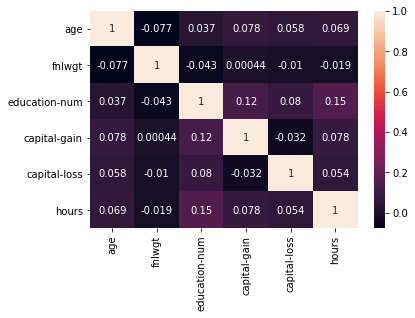

In [8]:
sns.heatmap(df.corr(), annot = True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a22260048>,
      dtype=object)

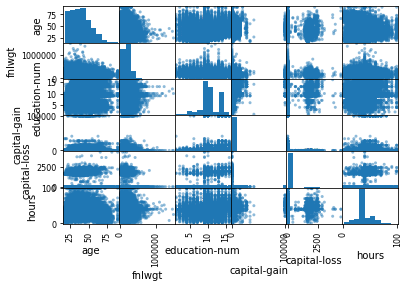

In [9]:
pd.plotting.scatter_matrix(df)

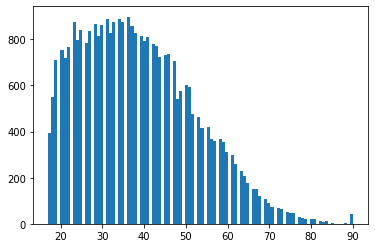

In [10]:
plt.hist(df['age'], bins = 100)
plt.show()

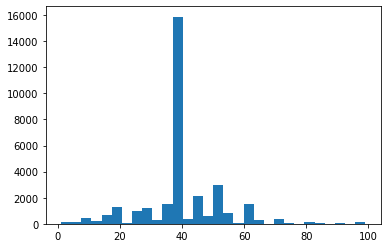

In [11]:
plt.hist(df['hours'], bins = 30)
plt.show()

In [12]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours,native-country,Salary
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [13]:
for i in df.loc[df['age']==0].index:
    df.loc[i, 'age'] = df['age'].mean()
for i in df.loc[df['fnlwgt']==0].index:
    df.loc[i, 'fnlwgt'] = df['fnlwgt'].mean()
for i in df.loc[df['education-num']==0].index:
    df.loc[i, 'education-num'] = df['education-num'].mean()
for i in df.loc[df['capital-gain']==0].index:
    df.loc[i, 'capital-gain'] = df['capital-gain'].mean()
for i in df.loc[df['capital-loss']==0].index:
    df.loc[i, 'capital-loss'] = df['capital-loss'].mean()
for i in df.loc[df['hours']==0].index:
    df.loc[i, 'hours'] = df['hours'].mean()

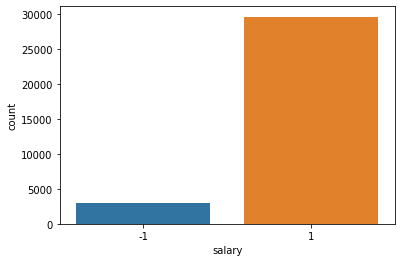

In [14]:
df['salary'] = np.where(df.hours > 20 , 1, -1)

sns.countplot(df['salary'])

In [15]:
df1=df
dropping=['workclass','education','marital-status','occupation','relationship','race','gender','native-country']

In [16]:
df1=df1.drop(columns=dropping)
df1 = df1.replace({' ?': np.nan}).dropna()
df1=df1.dropna()
df1 = df1.reset_index(drop=True)

In [17]:
df1.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours,Salary,salary
0,50,83311,13,1077.615172,87.306511,13,<=50K,-1
1,38,215646,9,1077.648268,87.309192,40,<=50K,1
2,53,234721,7,1077.681366,87.311874,40,<=50K,1
3,28,338409,13,1077.714464,87.314556,40,<=50K,1
4,37,284582,14,1077.747563,87.317237,40,<=50K,1


In [18]:
df1 = df1.drop('Salary', axis=1)

In [19]:
df1.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours,salary
0,50,83311,13,1077.615172,87.306511,13,-1
1,38,215646,9,1077.648268,87.309192,40,1
2,53,234721,7,1077.681366,87.311874,40,1
3,28,338409,13,1077.714464,87.314556,40,1
4,37,284582,14,1077.747563,87.317237,40,1


In [20]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
df1['fnlwgt']=lb.fit_transform(df1['fnlwgt'])
df1.dropna(how='any')   
df1.head(5)

,age,fnlwgt,education-num,capital-gain,capital-loss,hours,salary
0,50,2925,13,1077.615172,87.306511,13,-1
1,38,14085,9,1077.648268,87.309192,40,1
2,53,15335,7,1077.681366,87.311874,40,1
3,28,19354,13,1077.714464,87.314556,40,1
4,37,17699,14,1077.747563,87.317237,40,1


In [21]:
#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X, t)

## Preliminary Observation

Seeing the dataset we can examine that the dataset is giving discrete output hence this dataset is used for classification. Further the data consisted of missing values and string characters which needed preprocessing of data. Additionally feeding the data with feature matrix of a particular person helps to predict the salary.
From the above vizualization we can see that the histogram is skewed more towards the age below 40, which shows that people below the age of 40 can work for more no of hours. Moreover from the above histogram we could also see that the histogram for the work hours is maximum for 40 hours, so people can work maximum for 40 hours. Hence from the above vizualization we can infer the relation with the salary.

# III. Method


## Summary of Classification models

<br> <br>
### Pocket algorithm:
Pocket Alogorithm is considered to be the variant of perceptron algorithm. The idea of pocket algorithm is that it keeps the best result seen in its pocket (that is why it is called Pocket Learning Algorithm).The best result indicates that there is minimum number of misclassification. In this classification problem, weights are updated over every iteration so it is possible that a good weight was being replaced. There can be no guarantee on convergence if the data is not linearly seperable. This algorithm selects an arbitrary hyperplane that divides two classes, so it is possible to discover a decision boundary that is not the best. So to overcome this, pocket algorithm is used which keeps the best known weight so far in its pocket. 
<br>
w(k+1)=w(k)+α(ti)(xi) ,where α is learning rate
<br> <br>
This model is inherited using the base class and is implemented using a Pocket class which inherits the base class and it overrides the train and use methods. To compare the result of previous weights and new weights a compare method is added to the class.

<br> <br>


### QDA
When we have a binary classification problem, $k \in \{-1, +1\}$, we have a higher posterior probability $P(T = +1 \mid x)$ for the sample $x$ with the positive label.
Thus, 

$$
P(T = +1 \mid x) > P(T = -1 \mid x).
$$
In this algorithm, we calculate the posterior and prior probabilities and with the help of these we define a decision boundary. The data is assumed to follow Gaussian Distribution. For this approach, we calculate the means, covariances and prior probabilities.We calculate the mean, covariance and prior probability for the target and with the help of this we calculate the probability that one instance belongs to a class.

From the observation that both terms have the same cosmetics, we can define the discriminant function $\delta_k(xv)$ as

$$
\delta_k(xv) = -\frac{1}{2} \ln \vert \boldsymbol\Sigma_k \vert - \frac{1}{2} (xv - \boldsymbol\mu_k)^\top \boldsymbol\Sigma_k^{-1} (xv - \boldsymbol\mu_k) + \ln P(T = k). 
$$

Now, for a new sample $\tilde{xv}$, the label can be predicted with

$$
y = \arg\max_k \delta_k(\tilde{xv}). 
$$

The decision boundary is placed where the discriminant functions meet such as $\delta_1 == \delta_2$. 

Since the $\delta_k$ function is quadratic in x, the decision boundary is quadratic. 
We call this approach as **Quadratic Discriminant Analysis (QDA)**


<br> <br>

### LDA 

LDA is very much related to QDA. In QDA we had different covariance matrix for the classes but in LDA we assime that each class has the same covariance matrix. In LDA we follow some assumption that each attribute has the same variance and that the data is gaussian.

<br><br>
The probability that a new set of inputs belongs to each class is calculated by the predictions made by the LDA algorithm. The class with the highest probability is the output class. <br> <br>

$$
 \delta_k(xv) = xv^\top \boldsymbol\Sigma^{-1} \boldsymbol\mu_k -\frac{1}{2} \boldsymbol\mu_k^\top \boldsymbol\Sigma^{-1}\boldsymbol\mu_k + \ln P(T = k).
 $$

<br>
 In many cases, for simple computation, the covariance matrix $\boldsymbol\Sigma$ is chosen as an average of all the covariance matrices for all classes,

$$
 \boldsymbol\Sigma = \sum_k^K \frac{N_k}{N} \boldsymbol\Sigma_k.
 $$
 
 
 
 ### Logistic Regression 
 
We perform logistic regression when our target variable is categorical. Since linear regression is not suitable for classification problem because it is unbounded so, we go towards Logsitic regression. The range of their values is strictly from 0 to 1. To calculate which instance belongs to which class we use probability calculation. After the calculation of probability we see the instance belong to a particular class, if probability is greater than 0.5 then the instance belong to that class else it belongs to the other class. 
 
 <br> <br> 
 
 $$
 wv_j \leftarrow wv_j + \alpha \sum_{n=1}^{N} \Big( t_{n,j} - g_j(xv_n)\Big) xv_n.
 $$
 
 Converting the summation into matrix calculation,
 
 $$
 wv_j \leftarrow wv_j + \alpha Xm^\top \Big(  t_{*,j} - g_j(Xm)\Big).
 $$
 

## Explanation of code
There are two abstract methods in the base model class ie train() and use(). If any class extends this BaseModel class the that class has to provide implementation for these two abstract methods. Classifier class extends BaseModel class with functions again abstract. Classifier class consists of three concrete methods normalize(), check_matrix(), add_ones(). The check_matrix() is used to chcek whether the given matrix is 2D matrix or not, if the matrix is not 2-D matrix, then an erroe is raised. The add_ones() method checks whether the matrix is 2D or not and if the matriz is 2-D then a bias columns of 1's is added at the start of the matrix. The normalize function calculates the mean and standard devaition to normalize the input data.

### A. Super Classs Definition

In [22]:
import numpy as np
from abc import ABC, abstractmethod

# Super class for machine learning models 

class BaseModel(ABC):
    """ Super class for ITCS Machine Learning Class"""
    
    @abstractmethod
    def train(self, X, T):
        pass

    @abstractmethod
    def use(self, X):
        pass

    

class Classifier(BaseModel):
    """
        Abstract class for classification 
        
        Attributes
        ==========
        meanX       ndarray
                    mean of inputs (from standardization)
        stdX        ndarray
                    standard deviation of inputs (standardization)
    """

    def __init__(self, ):
        self.meanX = None
        self.stdX = None

    def normalize(self, X):
        """ standardize the input X """
        
        if not isinstance(X, np.ndarray):
            X = np.asanyarray(X)

        self.meanX = np.mean(X, 0)
        self.stdX = np.std(X, 0)

        # TODO: Finish this normalization
        Xs = (X-self.meanX)/self.stdX
        return Xs

    def _check_matrix(self, mat, name):
        if len(mat.shape) != 2:
            raise ValueError(''.join(["Wrong matrix ", name]))
        
    # add a basis
    def add_ones(self, X):
        """
            add a column basis to X input matrix
        """
        self._check_matrix(X, 'X')
        return np.hstack((np.ones((X.shape[0], 1)), X))

    ####################################################
    #### abstract funcitons ############################
    @abstractmethod
    def train(self, X, T):
        pass
    
    @abstractmethod
    def use(self, X):
        pass 

### B. Pocket Algorithm


In [23]:
from copy import deepcopy as copy 
import pandas as pd
class Pocket(Classifier): 
    
    
    def __init__(self):
        
        self.maxiter=10
        self.alpha=0.01
        self.w=None
        self.w_pocket=None
        
    @staticmethod   
    def compare(X, T, w, wp):
        y1 = np.sign(X @ w)
        yp = np.sign(X @ wp)

        return 1 if np.sum(y1 == T) >= np.sum(yp == T) else -1
    
    def train(self,X,T):
        N=X.shape[0]
        self.w = np.zeros(X.shape[1])
        self.w_pocket=copy(self.w)
        print(self.w_pocket)
        for i in range(self.maxiter):
            converged = True
            for k in range(N):
                y1 = self.w @ X[k]
                if np.sign(y1) != np.sign(T[k]):
                    self.w += self.alpha * T[k] * X[k]
                    converged = False
                    
                    if self.compare(X, T, self.w, self.w_pocket) > 0: 
                        self.w_pocket[:] = self.w[:]
    
            if converged:
                print("converged at ", i)
                break
        print("End of training: ", i)
        print(self.w_pocket)
        
    def use(self, X):
        return np.sign(X @ self.w_pocket)

## Explanation of code 
The Pocket Algorithm implements the abstract methods of the super class model and hence it is called the child class of the super class. Similar to the super class it consists of two methods ie train() and use(). The train() method is used to train the data. The use() function is used to predict the value by using the test data. In the train function we have used maximeter which means the maximum no of iteration, which explains the maximum number of times we will train the data. We have intialized the weight as 0 which is updated to w_pocket which is the pockrt that stores the best weight. If a better weigth is found we will upadte the weight with the better weight found and store it in w_pocket. Moreover we have used compare function which is used to compare the weights.

### C. QDA

In [24]:
from copy import deepcopy as copy
class QDA1(Classifier): 
    
    
    def __init__(self):
        Classifier.__init__(self)
        self.mu1=None
        self.Sigma1=None        
        self.Sigma2=None
        self.d1=None
        self.d2=None
        self.p1=None
        self.mu2=None
        self.p2=None
       
        
        
    @staticmethod    
    def QDAfunc(X, mu, sigma, p):
        sigma_inv = np.linalg.inv(sigma)
        sub = np.asarray(X - mu)
        return -0.5  * np.log(np.linalg.det(sigma)) - 0.5 * np.sum(sub @ sigma_inv * sub, axis=1) + np.log(p)
    
    
    def train(self,X_train,t):
        tt=self.normalize(X_train)
        new_df = pd.DataFrame(tt, index=X_train.index, columns=X_train.columns)
        new_df['salary']=t
        X1=new_df[new_df.salary == -1.0]
        X1=X1.drop(['salary'],axis=1)
        X2=new_df[new_df.salary == 1.0]
        X2=X2.drop(['salary'],axis=1)
        
        self.mu1 = np.mean(X1, 0)
        self.mu2 = np.mean(X2, 0)
        self.Sigma1 = np.cov(X1.T)
        self.Sigma2 = np.cov(X2.T)
        
        N1 = X1.shape[0]
        N2 = X2.shape[0]
        self.p1 = N1 / (N1+N2)
        self.p2 = N2 / (N1+N2)
    
    def use(self,X):
        Xtest=self.normalize(X)
        self.d1,self.d2=self.QDAfunc(Xtest,np.matrix(self.mu1),self.Sigma1,self.p1),self.QDAfunc(Xtest,np.matrix(self.mu2),self.Sigma2,self.p2)
        self.d1=np.array(self.d1).flatten()
        self.d2=np.array(self.d2).flatten()
        df = pd.DataFrame({'d1':self.d1, 'd2':self.d2})
        pred=np.where(df['d1']>df['d2'],-1,1)
        return pred,self.d1,self.d2

## Explanation of code 
The QDA Algorithm implements the abstract methods of the super class model and hence it is called the child class of the super class. The QDA function calculates the discriminant value for each class. Similar to the super class it consists of two methods ie train() and use(). The train() method is used to train the data. We have used the variable N1 and N2 to store the status of the rows.  Since in our output lable we have two class ie 1 and -1, so we store all the rows of class = 1 in N1 and similary for class= -1 in N2. The variables p1 and p2 is used to store the probabilities. And the variable mu1 and mu2 is used to store the mean. The variables Sigma1 and Sigma2 is used to store the covariance. The probability is calculated by the formula N1/N1+N2, where let N1 be the number os rows for class=1 and N1+N2 be the summation of the number of rows for both the classes. The use() method is used to calculate the d1 and d2 by calling the QDAfunc, it further checks the greater value and assigning the class -1 and 1 and then returns predicted output and d1,d1. 

### D. LDA

In [25]:
class LDA1(Classifier): 
    
    
    def __init__(self):
        Classifier.__init__(self)
        self.mu1=None
        self.Sigma1=None        
        self.d1=None
        self.d2=None
        self.p1=None
        self.mu2=None
        self.p2=None
        
        
    @staticmethod    
    def LDAfunc(X, mu, sigma, p):
        sigma_inv = np.linalg.inv(sigma)
        return np.sum(np.dot(X, sigma_inv) * mu \
                - 0.5 * np.dot(mu, sigma_inv) * mu \
                + np.log(p), axis=1)
    
    
    def train(self,X_train,t):
        tt=self.normalize(X_train)
        new_df = pd.DataFrame(tt, index=X_train.index, columns=X_train.columns)
        new_df['salary']=t
        X1=new_df[new_df.salary == -1.0]
        X1=X1.drop(['salary'],axis=1)
        X2=new_df[new_df.salary == 1.0]
        X2=X2.drop(['salary'],axis=1)
        
        
        self.mu1 = np.array(np.mean(X1, 0))
        self.mu2 = np.array(np.mean(X2, 0))
              
        self.Sigma = np.cov(tt.T)
        
        N1 = X1.shape[0]
        N2 = X2.shape[0]
        
        self.p1 = N1 / (N1+N2)
        self.p2 = N2 / (N1+N2)
        
    
    def use(self,X):
        Xtest=self.normalize(X)
        self.d1,self.d2=self.LDAfunc(Xtest,self.mu1,self.Sigma,self.p1),self.LDAfunc(Xtest,self.mu2,self.Sigma,self.p2)
        self.d1=np.array(self.d1).flatten()
        self.d2=np.array(self.d2).flatten()
        df = pd.DataFrame({'d1':self.d1, 'd2':self.d2})
        pred=np.where(df['d1']>df['d2'],-1,1)
        return pred,self.d1,self.d2

## Explanation of code
The LDA Algorithm implements the abstract methods of the super class model and hence it is called the child class of the super class. LDA function is also used to calculate the discriminant value.Similar to the super class it consists of two methods ie train() and use(). The train() method is used to train the data. We have used the variable N1 and N2 to store the status of the rows.  Since in our output lable we have two class ie 1 and -1, so we store all the rows of class = 1 in N1 and similary for class= -1 in N2. The variables p1 and p2 is used to store the probabilities. And the variable mu1 and mu2 is used to store the mean. The variables Sigma1 and Sigma2 is used to store the covariance. The probability is calculated by the formula N1/N1+N2, where let N1 be the number os rows for class=1 and N1+N2 be the summation of the number of rows for both the classes. The use() method is used to calculate the d1 and d2 by calling the LDAfunc, it further checks the greater value and assigning the class -1 and 1 and then returns predicted output and d1,d1. 

### E. Logistic Regression

In [26]:
class Logistic(Classifier): 

    def __init__(self,alpha):
        Classifier.__init__(self)
        self.w = None
        self.alpha = alpha
    
    def sigmoidfunc(self,z):
        if not isinstance(z, np.ndarray):
            z = np.asarray(z)
        f = np.exp(z) 
        return f / (np.sum(f, axis=1, keepdims=True) if len(z.shape) == 2 else np.sum(f))

    def g(self,X, w):
        return self.sigmoidfunc(X @ w) 
        
    
    def train(self, X, T):
        X = self.normalize(X)

       
        N = X.shape[0]
        D = X.shape[1]
        K = len(np.unique(T))
        
        self.w = np.zeros((D+1, K))
        niter = 10
        X = self.add_ones(X)
        T = self.add_ones(T.reshape(-1,1))
        T[:,0]=T[:,1]
        T[T[:,0]==1]=0
        (T[:,1])[T[:,1]==0]=1
        (T[:,0])[T[:,0]==-1]=1
        T[T==-1]=0
        for step in range(niter):
            ys = self.g(X,self.w)
            self.w += self.alpha * X.T @ (T - ys) 
              
    
    
    def use(self, X):
        Xs = self.normalize(X)
        Xs = self.add_ones(Xs)
        return self.g(Xs, self.w)

## Explanation of code
The Logistic Regression Algorithm implements the abstract methods of the super class model and hence it is called the child class of the super class. Similar to the super class it consists of two methods ie train() and use(). The train function takes input matrices as X and T. It calculates the values of the number of features ie D and number of unique classes in T ie equal to K. The use() function takes input as X which is the test data. It normalizes and add a column of bias to the test data X. It calculates the output by taking the dot product of X and weight matrix by using the sigmoid function. We have used the method sigmoidfunc to generalize the sigmoid function. 

# IV. Experiments

Apply the classfiers on the data and discuss the results.
Please describe your codes for experiments. You may have subsections of results and discussions here.
Here follows the list that you consider to include:
- the classification results
- plots of classification results 
- model comparision 
- choice of evaluation metrics
- **Must partition data into training and testing**

## Pocket Algorithm

In [27]:
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection

scaler = StandardScaler()


t=df1['salary']
df1_p=df1.drop(['salary'],axis=1)
X_train,X_test,y_train,y_test = model_selection.train_test_split(df1_p,t,test_size=0.30,random_state=40)

In [28]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)
y_train=np.array(y_train)
y_test=np.array(y_test)

In [29]:
p=Pocket()
p.train(X_train,y_train)

ypred_train=p.use(X_train)

ypred_p=p.use(X_test)

[0. 0. 0. 0. 0. 0.]
End of training:  9
[-0.00036152  0.00132262  0.00035304  0.0298081  -0.05768569  0.01059401]


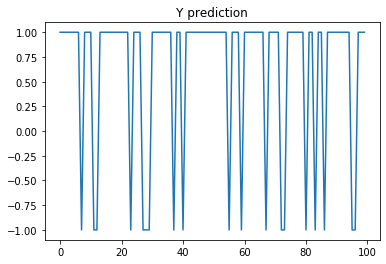

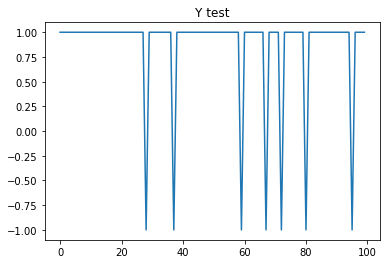

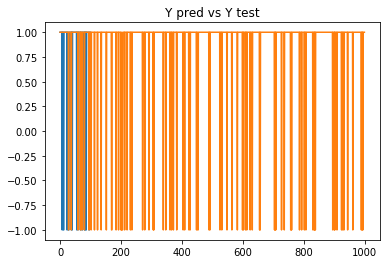

In [30]:
plt.title("Y prediction")
plt.plot(ypred_p[0:100])
plt.show()
plt.title("Y test")
plt.plot(y_test[0:100])
plt.show()
plt.title("Y pred vs Y test")
plt.plot(ypred_p[0:100])
plt.plot(y_test[0:1000])
plt.show()

### Accuracy, F1 score of train data

In [31]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report,accuracy_score, f1_score
print('Accuracy:', accuracy_score(y_train,ypred_train))
print('F1 score:', f1_score(y_train,ypred_train))

Accuracy: 0.8824587574587575
F1 score: 0.9309447093697641


### Confusion matrix of test data

In [32]:
cf=confusion_matrix(y_test, ypred_p)
TP=cf[1][1]
TN=cf[0][0]
FN=cf[1][0]
FP=cf[0][1]

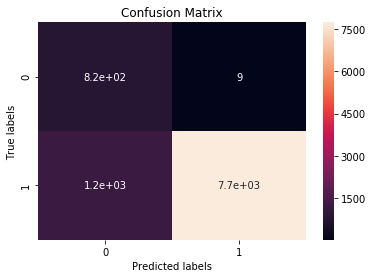

In [33]:
ax= plt.subplot()
sns.heatmap(cf, annot=True, ax = ax); 

ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix');

### Evaluation metrics

### Precision

In [34]:

precision=(TP/(TP+FP))
precision


0.9988394584139265

### Specificity

In [35]:
specificity=TN/(TN+FP)
specificity

0.9891826923076923

### Recall

In [36]:
recall=TP/(TP+FN)
recall

0.8668307967770814

### Accuracy, F1 score of test data

In [37]:
print('Accuracy:', accuracy_score(y_test,ypred_p))
print('F1 score:', f1_score(y_test,ypred_p))

Accuracy: 0.8772522522522522
F1 score: 0.9281648792762567


### ROC AUC Score

In [38]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, ypred_p)

0.9280067445423869

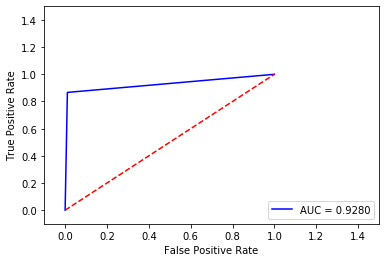

In [39]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, ypred_p)
roc_auc = auc(false_positive_rate, true_positive_rate)

plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.4f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.5])
plt.ylim([-0.1,1.5])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## 2. QDA

In [41]:
# Dividing data into train set and test set
from sklearn import model_selection
from sklearn.metrics import r2_score
t=df1.iloc[:,-1]
df1_d=df1.drop(['salary'],axis=1)
X_train,X_test,y_train,y_test = model_selection.train_test_split(df1_d,t,test_size=0.20,random_state=40)

In [42]:
# Training
q=QDA1()
q.train(X_train,y_train)

### Accuracy, F1 train data

In [43]:
ypred_qda_train,d1,d2=q.use(X_train)

In [44]:
print('Accuracy:', accuracy_score(y_train,ypred_qda_train))
print('F1 score:', f1_score(y_train,ypred_qda_train))

Accuracy: 0.9926289926289926
F1 score: 0.9959346150588633


### Test data prediction

In [45]:
ypred_qda_test,d1,d2=q.use(X_test)
print(d1)
print(d2)

[-18.45049559  -6.74339209 -13.66707312 ... -12.31968926 -25.40088222
 -23.26899262]
[-1.99970646 -0.52856527 -1.05587714 ... -1.23651344 -1.18696701
 -1.77528913]


### Confusion matrix test data

In [46]:
cf1=confusion_matrix(y_test, ypred_qda_test)
cf1

array([[ 516,   17],
       [  68, 5911]])

In [47]:
TP=cf1[1][1]
TN=cf1[0][0]
FN=cf1[1][0]
FP=cf1[0][1]

### Precision

In [48]:
precision=(TP/(TP+FP))
precision

0.9971322537112011

### Specificity

In [49]:
specificity=TN/(TN+FP)
specificity

0.9681050656660413

### Recall 

In [50]:
recall=TP/(TP+FN)
recall

0.9886268606790434

### Accuracy, F1

In [51]:
print('Accuracy:', accuracy_score(np.array(y_test), ypred_qda_test))
print('F1 score:', f1_score(np.array(y_test), ypred_qda_test))

Accuracy: 0.9869471744471745
F1 score: 0.9928613420676913


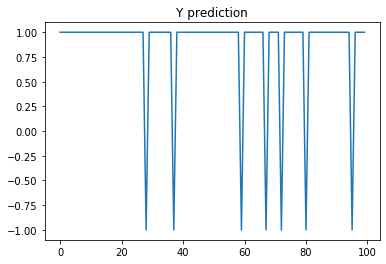

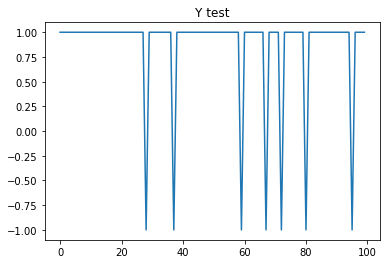

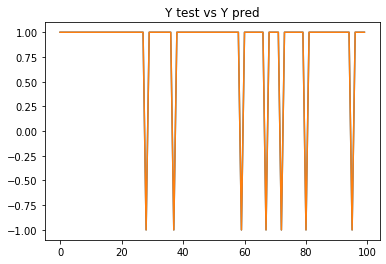

In [52]:
plt.title("Y prediction")
plt.plot(ypred_qda_test[0:100])
plt.show()
plt.title("Y test")
plt.plot(np.array(y_test[0:100]))
plt.show()
plt.title("Y test vs Y pred")
plt.plot(ypred_qda_test[0:100])
plt.plot(np.array(y_test[0:100]))
plt.show()

#### ROC AUC Score

In [53]:
roc_auc_score(y_test, ypred_qda_test)

0.9783659631725423

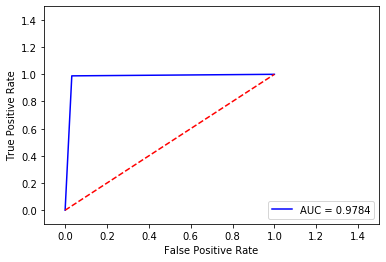

In [54]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, ypred_qda_test)
roc_auc = auc(false_positive_rate, true_positive_rate)

plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.4f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.5])
plt.ylim([-0.1,1.5])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

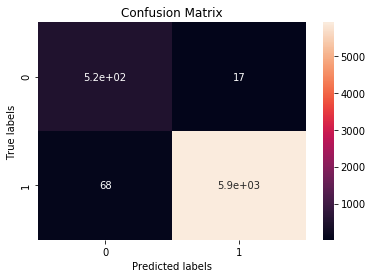

In [55]:
ax= plt.subplot()
sns.heatmap(cf1, annot=True, ax = ax); 

ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix');

Text(0.5, 0.92, 'QDA Discriminant Functions')

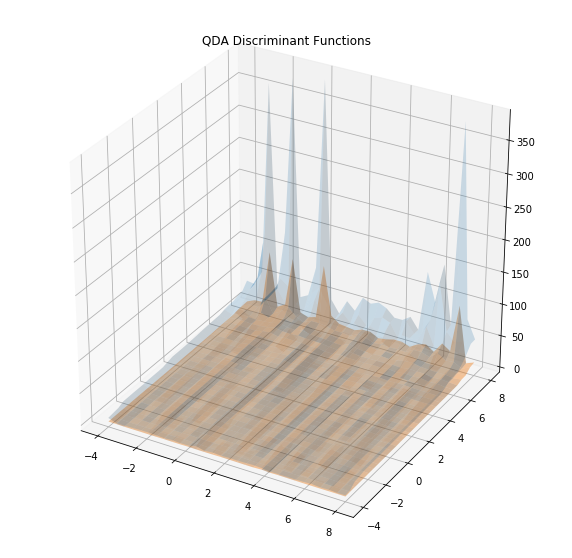

In [56]:
from mpl_toolkits.mplot3d import Axes3D
p,d1_p,d2_p = q.use(X_test[:900])    #predicted


xs, ys = np.meshgrid(np.linspace(-4,8, 30), np.linspace(-4,8, 30))
fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection='3d')
ax.plot_surface(xs, ys, np.sort(-1 *d1_p.reshape(xs.shape),0), alpha=0.2)
ax.plot_surface(xs, ys, np.sort(-1 *d2_p.reshape(xs.shape),0), alpha=0.4)
plt.title("QDA Discriminant Functions")

Text(0.5, 0.92, 'QDA Discriminant Functions')

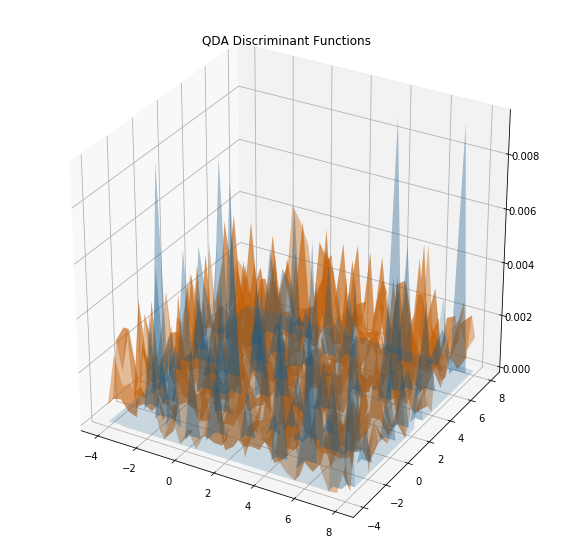

In [57]:
fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection='3d')
prob1 = np.exp( d1_p.reshape(xs.shape) - 0.5*X_train.shape[1]*np.log(2*np.pi) - np.log(q.p1))
prob2 = np.exp( d2_p.reshape(xs.shape) - 0.5*X_train.shape[1]*np.log(2*np.pi) - np.log(q.p2))
ax.plot_surface(xs, ys, prob1, alpha=0.2)
ax.plot_surface(xs, ys, prob2, alpha=0.4)

plt.title("QDA Discriminant Functions")

Text(0.5, 1.0, 'Decision Boundary')

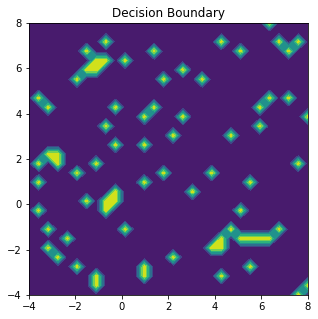

In [58]:
plt.figure(figsize=(5,5))
plt.contourf(xs, ys, (((d1_p-d2_p)) > 0).reshape(xs.shape))
plt.title("Decision Boundary")

## 3. LDA

In [59]:
l=LDA1()
l.train(X_train,y_train)

In [60]:
ypred_lda_train,d1,d2=l.use(X_train)

### Accuracy,F1 score on train data

In [61]:
print('Accuracy:', accuracy_score(y_train,ypred_lda_train))
print('F1 score:', f1_score(y_train,ypred_lda_train))

Accuracy: 0.9080543611793612
F1 score: 0.9518118347719362


In [62]:
ypred_lda_test,d1,d2=l.use(X_test)

### Confusion matrix

In [63]:
from sklearn.metrics import confusion_matrix
cf2=confusion_matrix(y_test, ypred_lda_test)
cf2

array([[   0,  533],
       [   0, 5979]])

In [64]:
TP=cf2[1][1]
TN=cf2[0][0]
FN=cf2[1][0]
FP=cf2[0][1]

### Precision, Specificity and Recall

In [65]:
precision=TP/(TP+FP)
specificity=TN/(TN+FP)
recall=TP/(TP+FN)
print('Precision: ' ,precision)
print('Specificity: ' ,specificity)
print('Recall: ' ,recall)

Precision:  0.9181511056511057
Specificity:  0.0
Recall:  1.0


### Accuracy and F1 score

In [66]:
print('Accuracy:', accuracy_score(y_test, ypred_lda_test))
print('F1 score:', f1_score(y_test, ypred_lda_test))

Accuracy: 0.9181511056511057
F1 score: 0.9573292770794973


### ROC AUC Score

In [67]:
roc_auc_score(y_test, ypred_lda_test)

0.5

In [68]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, ypred_lda_test)
roc_auc = auc(false_positive_rate, true_positive_rate)

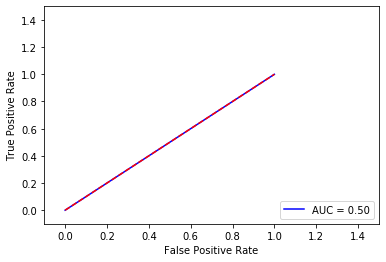

In [69]:
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.5])
plt.ylim([-0.1,1.5])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

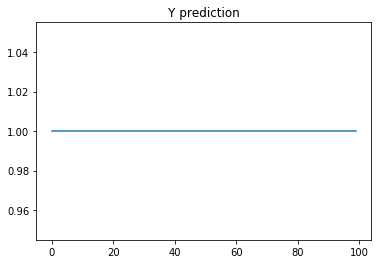

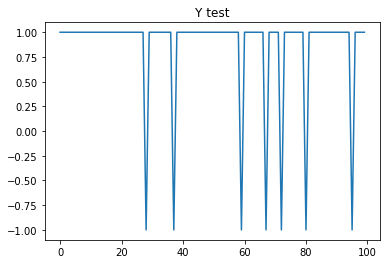

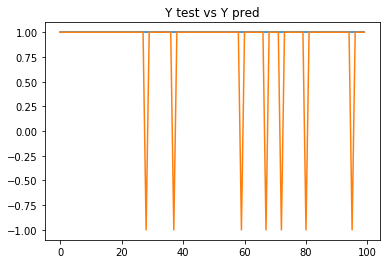

In [70]:
plt.title("Y prediction")
plt.plot(ypred_lda_test[0:100])
plt.show()
plt.title("Y test")
plt.plot(np.array(y_test[0:100]))
plt.show()
plt.title("Y test vs Y pred")
plt.plot(ypred_lda_test[0:100])
plt.plot(np.array(y_test[0:100]))
plt.show()

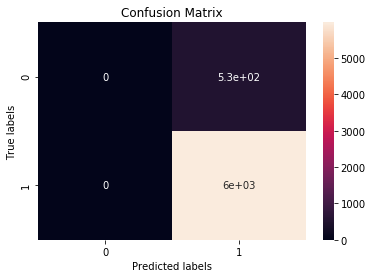

In [71]:
ax= plt.subplot()
sns.heatmap(cf2, annot=True, ax = ax); 

ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix');

In [72]:
p,d1_p,d2_p = l.use(X_test[:900]) #predicted


Text(0.5, 0.92, 'LDA Discriminant Functions')

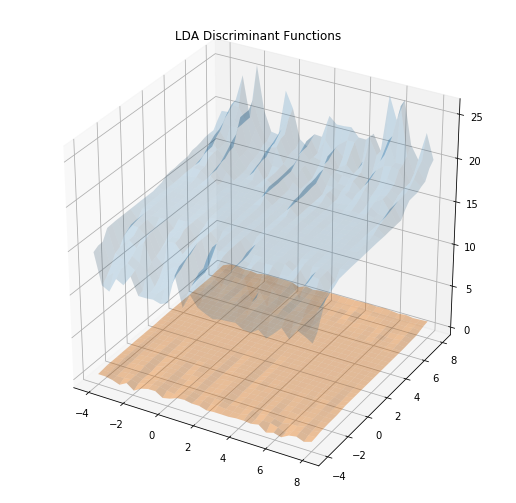

In [73]:
from mpl_toolkits.mplot3d import Axes3D
xs, ys = np.meshgrid(np.linspace(-4,8, 30), np.linspace(-4,8, 30))
fig = plt.figure(figsize=(9,9))
ax = fig.gca(projection='3d')
ax.plot_surface(xs, ys, np.sort(-1 *d1_p.reshape(xs.shape),0), alpha=0.2)
ax.plot_surface(xs, ys, np.sort(-1 *d2_p.reshape(xs.shape),0), alpha=0.4)
plt.title("LDA Discriminant Functions")

Text(0.5, 0.92, 'LDA Discriminant Functions')

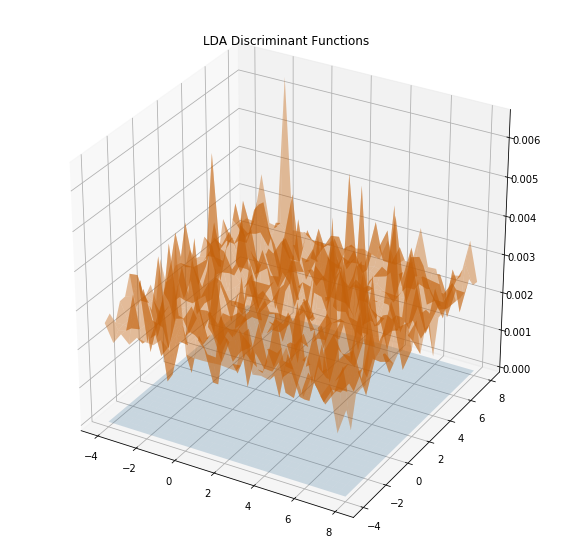

In [74]:
fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection='3d')
prob1 = np.exp( d1_p.reshape(xs.shape) - 0.5*X_train.shape[1]*np.log(2*np.pi) - np.log(l.p1))
prob2 = np.exp( d2_p.reshape(xs.shape) - 0.5*X_train.shape[1]*np.log(2*np.pi) - np.log(l.p2))
ax.plot_surface(xs, ys, prob1, alpha=0.2)
ax.plot_surface(xs, ys, prob2, alpha=0.4)
plt.title("LDA Discriminant Functions")

Text(0.5, 1.0, 'Decision Boundary')

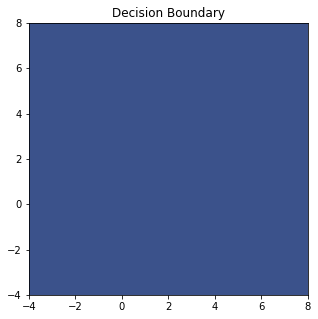

In [75]:
plt.figure(figsize=(5,5))
plt.contourf(xs, ys, (((d1_p-d2_p)) > 0).reshape(xs.shape))
plt.title("Decision Boundary")

## 4. Logistic Regression

In [76]:
lr = Logistic(0.0001)
XTrain, XTest, YTrain, YTest = model_selection.train_test_split(df1_d, t,test_size=0.20,random_state=42)

In [77]:
lr.train(XTrain[:],np.array(YTrain[:]))
ypred_lr_train = lr.use(XTrain[:])
ypred_lr_train = np.argmax(ypred_lr_train, 1)
print(ypred_lr_train)
y_train=np.array(YTrain)
y_train=np.where(YTrain==-1,0,1)
print(y_train)

[1 0 0 ... 1 1 1]
[1 0 0 ... 1 1 1]


### Accuracy, F1 on train data

In [78]:
print('Accuracy:', accuracy_score(y_train, ypred_lr_train))
print('F1 score:', f1_score(y_train, ypred_lr_train))

Accuracy: 0.9980036855036855
F1 score: 0.9989017951425554


In [79]:
ypred_lr_test = lr.use(XTest[:])
ypred_lr_test

array([[0.60517263, 0.39482737],
       [0.02871568, 0.97128432],
       [0.00146439, 0.99853561],
       ...,
       [0.81200767, 0.18799233],
       [0.02829742, 0.97170258],
       [0.00386568, 0.99613432]])

In [80]:
ypred_lr_test = np.argmax(ypred_lr_test, 1)
print(ypred_lr_test)
y_test=np.array(YTest)
y_test=np.where(YTest==-1,0,1)
print(y_test)

[0 1 1 ... 0 1 1]
[0 1 1 ... 0 1 1]


### Confusion matrix

In [81]:
cf3=confusion_matrix(y_test, ypred_lr_test)
cf3

array([[ 581,    0],
       [  16, 5915]])

In [82]:
TP=cf3[1][1]
TN=cf3[0][0]
FN=cf3[1][0]
FP=cf3[0][1]

### Precision, Specificity and Recall

In [83]:
precision=TP/(TP+FP)
specificity=TN/(TN+FP)
recall=TP/(TP+FN)
print('Precision: ' ,precision)
print('Specificity: ' ,specificity)
print('Recall: ' ,recall)

Precision:  1.0
Specificity:  1.0
Recall:  0.9973023098971505


### Accuracy, F1 on test data

In [84]:
print('Accuracy:', accuracy_score(y_test, ypred_lr_test))
print('F1 score:', f1_score(y_test, ypred_lr_test))

Accuracy: 0.9975429975429976
F1 score: 0.9986493331082221


### ROC AUC Score

In [85]:
roc_auc_score(y_test, ypred_lr_test)


0.9986511549485753

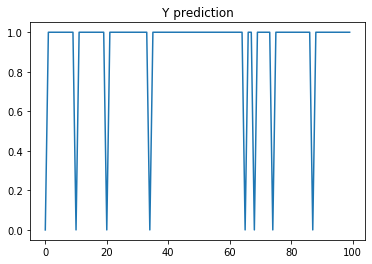

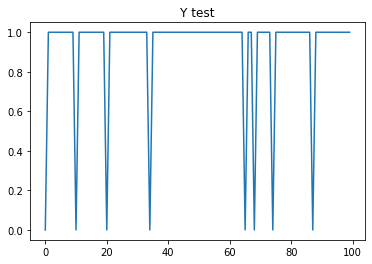

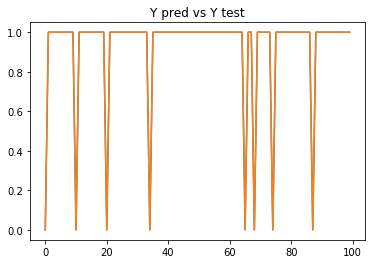

In [86]:
plt.title("Y prediction")
plt.plot(ypred_lr_test[0:100])
plt.show()
plt.title("Y test")
plt.plot(np.array(y_test[0:100]))
plt.show()
plt.title("Y pred vs Y test")
plt.plot(ypred_lr_test[0:100])
plt.plot(np.array(y_test[0:100]))
plt.show()

Text(0.5, 1, 'Confusion Matrix')

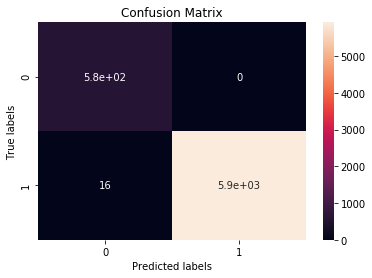

In [87]:
ax= plt.subplot()
sns.heatmap(cf3, annot=True, ax = ax);

ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix')

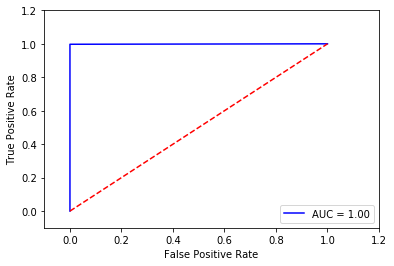

In [88]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, ypred_lr_test)
roc_auc = auc(false_positive_rate, true_positive_rate)


##Plotting now
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Discussion about evaluation metrics

Confusion matrix: The confudion matrix is a method of describing the performance of classification model on the test dataset.

Precision (also called positive predictive value) is the fraction of relevant instances among the retrieved instances, while recall (also known as sensitivity) is the fraction of the total amount of relevant instances that were actually retrieved. Both precision and recall are therefore based on an understanding and measure of relevance.

#### Precision, Recall and Specificity 

Precision : It is also called as predictive positive value. It is stated as the fraction of relevant instances within the retrieved instances.<br>
    
    precision=TP/(TP+FP)

Recall : It is also known as sensitivity, which is given as the ratio of total amount of relevant instances that were actually retrieved. <br>
    
    
    recall=TP/(TP+FN)



Specificity : It is also known as true negative rate. It is the measure of the correctly identified actual negatived.<br>
    
    
    specificity=TN/(TN+FP)


#### F1 Score

F1 Score measures the test acurracy. It considers in account both the Precision and recall. The F1 score is siad to be the harmonic mean of the precision and recall, and it reaches it's best value at 1 and worst at 0.


#### ROC Curve

The ROC is called as a relative operating characteristic curve, since it is a comparison of two operating characteristics. It is curve that is plotted with the true positive rate against the false positive rate.

## Discussion about Train and Test accuracies

### Pocket Algorithm 


The result for the data on which the algorithm is trained is as follows: <br> <br>

Accuracy: 0.8824587574587575 <br>
F1 score: 0.9309447093697641 <br> 


The result for the data on which the algorithm is tested is as follows:: <br><br>

Precision: 0.9988394584139265 <br>
Specificity: 0.9891826923076923 <br>
Recall: 0.8668307967770814 <br>


ROC AUC Score: 0.9280067445423869<br>



Pocket algorithm gave precision for training as 88% and while testing it gave 99% which is comparitively greater which shows that the algorithm was able to classify more correcly when testing of data compared to training. 
 
<br> <br>
From above results we can say that our model is working well both on train data and test data. 
 

### QDA 

For Trained data, the result is: <br><br>

Accuracy: 0.9926289926289926
F1 score: 0.9959346150588633<br><br>

On test data, the result is: <br><br>

Precision: 0.9971322537112011<br>
Specificity: 0.9681050656660413<br>
Recall: 0.9886268606790434<br>

ROC AUC Score: 0.9783659631725423<br>

From the above observation we can predict that QDA algorithm was able to classify almost all the positive class correctly with an accuracy of 99% on both the training and test dataset.
Recall known as sensitivity, which is given as the ratio of total amount of relevant instances that were actually retrieved value is 98%. It is a measure of how many of the positive samples have been identified as being positive.  


### LDA 

For trained data, the result is: <br><br>
Accuracy: 0.9080543611793612<br>
F1 score: 0.9518118347719362<br>


On test data, the result is: <br><br>

Precision: 0.9181511056511057<br>
Specificity: 0.0<br>
Recall:  1.0<br>

Accuracy: 0.9181511056511057<br>
F1 score: 0.9573292770794973<br>


ROC AUC Score: 0.5<br>

From the above observation we can predict that LDA algorithm was able to classify almost all the positive class correctly with an accuracy of 90% and 91% on both the training and test dataset.
Recall which is given as the ratio of total amount of relevant instances that were actually retrieved value is 1.0. It is a measure of how many of the positive samples have been identified as being positive.



### Logistic Regression


For training data, the result is: <br><br><br>
Accuracy: 0.9980036855036855<br>
F1 score: 0.9989017951425554<br>


On test data, the result is: <br><br>
Precision: 1.0<br>
Specificity:  1.0<br>
Recall:  0.9973023098971505<br>


Accuracy: 0.9975429975429976<br>
F1 score: 0.9986493331082221<br>


ROC AUC Score: 0.9986511549485753<br>


Logistic regression performed good on the training data, but the accuracy on test data is around 99% which shows that there is overfitting and we avoid it by better preprocessing of our dataset. It has achieved almost same accuracy and F1 score both on train and test data. 

## Discussions about Classification model comparision

From the results shown in the assignment we can see that logistic regression perfoemed the best on our dataset as compares to all the other algorithms. The pocket algorithm performed the wordt on our dataset, If compared individually it is giving a decent value for the recall but when compared to the other three algorithms it is not. The recall value for LDA is 1 which shows that LDA was able to classify all the positive samples correctly to its true class label. 



Pocket<br>
Precision: 0.9988394584139265 <br>
Specificity: 0.9891826923076923 <br>
Recall: 0.8668307967770814 <br>



QDA <br> 
Precision: 0.9971322537112011<br>
Specificity: 0.9681050656660413<br>
Recall: 0.9886268606790434<br>



LDA <br>
Precision: 0.9181511056511057<br>
Specificity: 0.0<br>
Recall:  1.0<br>






Logistic Regession <br> 
Precision: 1.0<br>
Specificity:  1.0<br>
Recall:  0.9973023098971505<br>

# Conclusions

If we compare the accuracy and F1 score then I would say that logistic regression performed the best on my dataset as compared to all the other algorithms. The recall value for LDA is 1 which shows that LDA was able to classify all the positive samples correctly to its true class label so this algorithm also performed well. I have gain alot of insights from this assignment since I was able to successfully do the coding of all the four algorithms and understand the implemntation and the logic behind the working of these algorithms. Moreover we were supposed to calculate the evaluation metrices which helped me gain alot of insights about the algorithms.

# References

1)“Notebook on Nbviewer.” Jupyter Notebook Viewer, https://nbviewer.jupyter.org/url/webpages.uncc.edu/mlee173/teach/itcs6156/notebooks/notes/Note-Linear Classification.ipynb.<br>
2)“Notebook on Nbviewer.” Jupyter Notebook Viewer, https://nbviewer.jupyter.org/url/webpages.uncc.edu/mlee173/teach/itcs6156/notebooks/notes/Note-Classification.ipynb<br>
3)Marksman. “US Adult Income: Salary Prediction.” Kaggle, Kaggle, 18 Aug. 2017, https://www.kaggle.com/marksman/us-adult-income-salary-prediction/data.